In [1]:
import pandas as pd

In [2]:
df_weeks = pd.read_pickle('spotify_data/big_boy_df.pkl')
df_weeks = df_weeks.drop_duplicates()
df_api = pd.read_pickle('spotify_data/api_df.pkl')
df_api = df_api.drop_duplicates()
df_merge = pd.merge(df_weeks, df_api, left_on='spotify_url', right_on='spotify_url', how='inner')
df = df_merge.drop_duplicates()

len(df_weeks), len(df_api), len(df), len(df_merge)

(270399, 8561, 217536, 217536)

In [9]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [125]:
one_week = '2022-03-03'
len(df_weeks[df_weeks.country=='ie']), len(df_weeks[df_weeks.country=='es'])

(10400, 10400)

In [4]:
# selected_weeks = ['2022-03-03','2022-03-10','2022-03-17','2022-03-24','2022-03-31','2022-04-07','2022-04-14','2022-04-21','2022-04-28','2022-05-05','2022-05-12','2022-05-19','2022-05-26','2022-06-02','2022-06-09','2022-06-16','2022-06-23','2022-06-30',]
selected_weeks = set(df_weeks.week_start)
ranking_threshold = 50
to_scrape = []
for week in selected_weeks:
    df_one_week = df_weeks[df_weeks.week_start == week]
    countries = list(set(df_weeks.country))
    for c in countries:
        to_scrape.append(df_one_week[df_one_week.country==c][:ranking_threshold].spotify_url.values)

unique_songs_to_scrape = np.unique(np.asarray(to_scrape).squeeze())
total_songs = len(selected_weeks)*len(countries)*ranking_threshold
print(f'Total (unique) songs to scrape: {unique_songs_to_scrape.shape}, total instances {total_songs}')

# np.unique(np.asarray(to_scrape).squeeze()).shape, len(countries)*len(selected_weeks)*ranking_threshold

Total (unique) songs to scrape: (3774,), total instances 67600


In [82]:
df_weeks_ranking


,spotify_url,week_start,streams,country,ranking
0,2mnXxnrX5vCGolNkaFvVeM,2022-12-15,256566,do,1
1,5Uq9MSXpOKkvxbk701GmYK,2022-12-15,171816,do,2
2,1dnlWBC8oXaxzDQWtDxies,2022-12-15,164808,do,3
3,6Sq7ltF9Qa7SNFBsV5Cogx,2022-12-15,148057,do,4
4,5ww2BF9slyYgNOk37BlC4u,2022-12-15,134607,do,5
...,...,...,...,...,...
195,6gBFPUFcJLzWGx4lenP6h2,2022-03-03,211304,ca,196
196,0I3q5fE6wg7LIfHGngUTnV,2022-03-03,210654,ca,197
197,3eJH2nAjvNXdmPfBkALiPZ,2022-03-03,210431,ca,198
198,7fBv7CLKzipRk6EC6TWHOB,2022-03-03,210308,ca,199


In [ ]:
already_scraped = list(df_api.spotify_url)
please_scrape_me = []
for i,s in enumerate(unique_songs_to_scrape):
    if s not in already_scraped and s not in temp:
        please_scrape_me.append(s) 
len(please_scrape_me), please_scrape_me

In [ ]:
scraped_songs = []

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import confidential
from time import sleep

cid = confidential.CID
secret = confidential.SECRET

client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, client_secret=secret
)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_features(id):
    metadata = sp.track(id)
    features = sp.audio_features(id)

    # metadata
    name = metadata["name"]
    album = metadata["album"]["name"]
    artist = metadata["album"]["artists"][0]["name"]
    release_date = metadata["album"]["release_date"]
    length = metadata["duration_ms"]
    popularity = metadata["popularity"]

    # audio features
    acousticness = features[0]["acousticness"]
    danceability = features[0]["danceability"]
    energy = features[0]["energy"]
    instrumentalness = features[0]["instrumentalness"]
    liveness = features[0]["liveness"]
    loudness = features[0]["loudness"]
    speechiness = features[0]["speechiness"]
    tempo = features[0]["tempo"]
    time_signature = features[0]["time_signature"]
    url = id

    track = [
        name,
        album,
        artist,
        release_date,
        length,
        popularity,
        danceability,
        acousticness,
        energy,
        instrumentalness,
        liveness,
        loudness,
        speechiness,
        tempo,
        time_signature,
        url,
    ]
    return track

for i, url in enumerate(please_scrape_me):
    print(f'Processing... {i}/{len(please_scrape_me)} {url}')
    try:
        track = get_track_features(url)
        scraped_songs.append(track)
    except:
        print(f'scummy alert {url}')
        scummy.append(url)
        continue
    if not i % 1000:
        print('Sleeping... xoxo', flush=True)
        # sleep(10)

In [22]:
df_api_2 = pd.DataFrame(
    scraped_songs,
    columns=[
        "name",
        "album",
        "artist",
        "release_date",
        "length",
        "popularity",
        "danceability",
        "acousticness",
        "energy",
        "instrumentalness",
        "liveness",
        "loudness",
        "speechiness",
        "tempo",
        "time_signature",
        "spotify_url",
    ],
)

In [73]:
# Stinky business
artificial = ['Que a Pasao', 'Que a Pasao','Big Apple', '2021-01-01', 250533, 80, 0.608, 0.5970, 0.626,0.000002,0.250,-4.773, 0.3010, 176.086, 4, '5saUoeceT2zau6ScmU77e6']
art = dict(zip(df_api.columns, [[a] for a in artificial]))
df_api_merged = pd.concat([df_api_2, pd.DataFrame(art)])

In [63]:
df_api_merged = pd.concat([df_api, df_api_2])
df_api_merged

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,spotify_url
0,I Drink Wine,30,Adele,2021-11-19,376169,78,0.437,0.69700,0.565,0.000000,0.1190,-5.596,0.0466,115.389,4,6v0UJD4a2FtleHeSYVX02A
1,Não Sei o Que Lá,Festa das Patroas 35%,Marília Mendonça,2021-10-14,169586,72,0.643,0.26600,0.699,0.000000,0.1160,-5.458,0.1120,115.947,4,28m65cMH7QXHzFnZSTtNHY
2,Dancing’s Done,Dancing's Done,Ava Max,2022-12-20,166906,80,0.588,0.01710,0.835,0.000002,0.1130,-3.141,0.0595,113.997,4,06yG42F8p8l621YLki0rp2
3,Somewhere Only We Know,Hopes And Fears,Keane,2004-01-01,236160,77,0.453,0.07940,0.655,0.000008,0.0849,-4.220,0.0259,172.012,4,0ll8uFnc0nANY35E0Lfxvg
4,Ritalin,Ritalin,Lil Lano,2022-01-28,183828,44,0.755,0.24100,0.517,0.000116,0.0927,-9.892,0.0614,139.933,4,1xrLpfoNGMTlGyO8sNjZVa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,S.P.J.D.,"Jsem v pohodě, sem v prdeli.",Nik Tendo,2021-07-30,128371,53,0.697,0.29600,0.699,0.000000,0.1220,-7.877,0.2470,171.978,4,7wvhiIXKMCeE39WpRDnLHT
840,Nur für Dich,Für den Himmel durch die Hölle,Kontra K,2022-08-25,192506,74,0.670,0.72200,0.498,0.000000,0.1160,-8.236,0.3320,81.914,4,7y2CanQNBGTd7EVJy80hLC
841,Night Away (Dance) (feat. Tion Wayne),Night Away (Dance) (feat. Tion Wayne),A1 x J1,2022-03-03,175774,75,0.706,0.23500,0.552,0.000000,0.1440,-9.479,0.0833,142.037,4,7z5G2LOdV8okZn4yWg3q5g
842,Hvor Har Du Lært Det,Hvor Har Du Lært Det,GMG,2022-05-21,138750,52,0.853,0.00887,0.647,0.000000,0.0994,-7.386,0.1390,128.016,4,7zBD2Y6xoOMgm4ftGHFWfW


In [261]:
selected_weeks = ['2022-03-03','2022-03-10','2022-03-17','2022-03-24','2022-03-31','2022-04-07','2022-04-14','2022-04-21','2022-04-28','2022-05-05','2022-05-12','2022-05-19','2022-05-26','2022-06-02','2022-06-09','2022-06-16','2022-06-23','2022-06-30',]
ranking_threshold = 50
for week in selected_weeks:
    df_one_week = df_weeks[df_weeks.week_start == one_week]
    num_features = len(df_api.columns[4:-1])
    countries = list(set(df.country))
    c_ranking = {}
    sample_space = {}
    for i, c in enumerate(countries):
        c_ranking[c] = list(df_one_week[df_one_week.country==c].spotify_url)
        sample_space[c]=[]
        for j, url in enumerate(c_ranking[c][:ranking_threshold]):
            sample_space[c].append(df_api[df_api.spotify_url==url].values.squeeze())

i = 0
for c in countries:
    i += len(sample_space[c])==ranking_threshold


In [ ]:
dimension = len(sample_space.keys()), ranking_threshold, len(sample_space['ie'][0][5:-1])
X = np.zeros(dimension)
sample_space
for i, (k,v) in enumerate(sample_space.items()):
    for s in range(ranking_threshold):
        print(k, v[s], v[s][5:-1].shape,  X[i][s].shape)
        X[i][s]=v[s][5:-1]

    # X[i] = v[]
# dimension, X.shape, sample_space.items()

In [132]:
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [83]:
df_api_merged.to_pickle('df_api_needed.pkl')

In [131]:
X.shape

(6, 2)

In [143]:
X_train.shape

(375, 2)

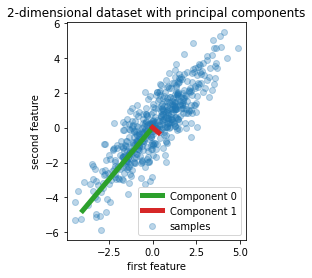

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

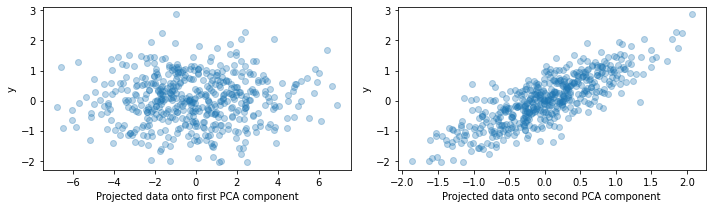

In [141]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

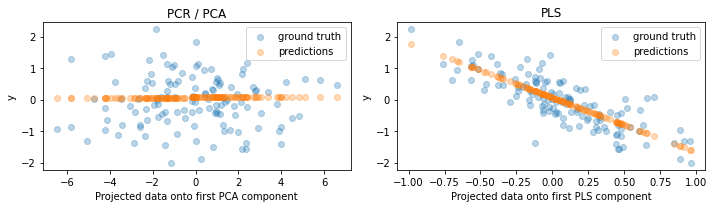

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()